In [12]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [17]:
import pandas as pd
import numpy as np
Airlines = pd.read_excel("EastWestAirlines (1).xlsx")

In [19]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [20]:
Airlines.shape

(26, 5)

In [21]:
# Finding missing
Airlines.isna().sum()

East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64

In [22]:
Airlines.describe()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


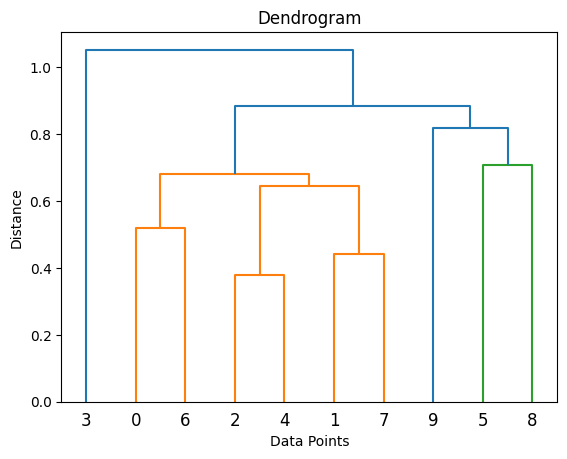

In [36]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
np.random.seed(0)
data_points = 10
features = 5
Airlines = np.random.rand(data_points, features)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(Airlines, method='average')
dendrogram = sch.dendrogram(linkage_matrix)
# Display the dendrogram
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [38]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Airlines)


In [40]:
y_AC = AC.fit_predict(Airlines)
Clusters=pd.DataFrame(y_AC,columns=['Clusters'])
Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,0
1,0
2,0
3,3
4,0
5,4
6,0
7,0
8,2
9,1


In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9,random_state=0)
kmeans.fit(Airlines)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=0)

In [47]:
kmeans.inertia_

0.071301859086088

In [ ]:
wcss = []
for i in range(0, 10):
    kmeans = KMeans(n_clusters=1,random_state=0)
    kmeans.fit(Airlines)
    wcss.append(kmeans.inertia_)

In [148]:
wcss

[3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524,
 3.29308464805524]

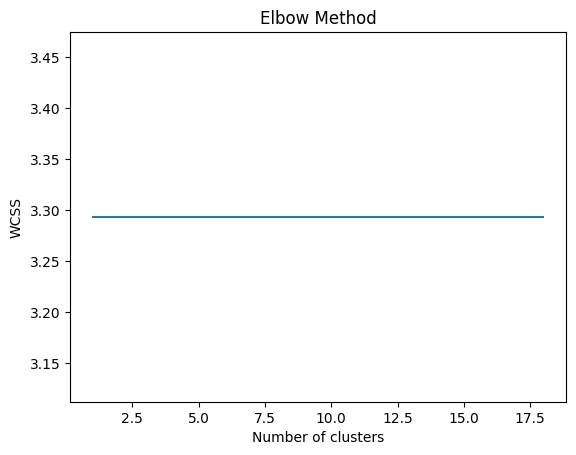

In [135]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(Airlines)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [92]:
clusters_new.labels_

array([0, 5, 3, 4, 3, 2, 0, 5, 1, 6], dtype=int32)

In [94]:
# Converting to dataframe
df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])


In [104]:
# Convert Airlines and df to DataFrames
Airlines_df = pd.DataFrame(Airlines)
df_df = pd.DataFrame(df)

In [108]:
airlines1 = pd.concat([Airlines_df, df_df], axis=1)
airlines1

,0,1,2,3,4,Cluster ID
0,0.548814,0.715189,0.602763,0.544883,0.423655,0
1,0.645894,0.437587,0.891773,0.963663,0.383442,5
2,0.791725,0.528895,0.568045,0.925597,0.071036,3
3,0.087129,0.020218,0.832620,0.778157,0.870012,4
4,0.978618,0.799159,0.461479,0.780529,0.118274,3
5,0.639921,0.143353,0.944669,0.521848,0.414662,2
6,0.264556,0.774234,0.456150,0.568434,0.018790,0
7,0.617635,0.612096,0.616934,0.943748,0.681820,5
8,0.359508,0.437032,0.697631,0.060225,0.666767,1
9,0.670638,0.210383,0.128926,0.315428,0.363711,6


In [113]:
airlines2 = airlines1.drop(['Cluster ID'], axis=1)

In [123]:
grouped_data = df.groupby("Cluster ID").mean()

In [124]:
grouped_data

""
Cluster ID
0
1
2
3
4
5
6
